[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mthomp89/NU_489_capstone/NIH_EDA-1.ipynb ]

**This section works to download all of the data from Kaggle.**
**I couldn't get just the .csv file to download and didn't want to wait for all 43 GB to transfer, so I just stored it in my Google Drive.**

In [0]:
# bring in Colab files
from google.colab import files

# load Kaggle
!pip install -q Kaggle

In [0]:
# bring in Kaggle API
api = files.upload() 

Saving kaggle.json to kaggle (1).json


In [0]:
# make a directory to save the .json file

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
# load Kaggle data

!kaggle datasets download -d nih-chest-xrays/data/Data_Entry_2017.csv.zip

data.zip: Skipping, found more recently modified local copy (use --force to force download)


**Starting here I am just importing the Data_Entry_2017.csv file from a saved location, not Kaggle**

In [1]:
# load G Drive files

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# bring in Python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# load data file
df = pd.read_csv('/content/drive/My Drive/Capstone/Data_Entry_2017.csv', low_memory=False)

In [4]:
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [0]:
# clean up some of the columns names

df.rename(columns = {'OriginalImage[Width': 'ImageWidth', 'Height]': 'ImageHeight', 'OriginalImagePixelSpacing[x': 'ImageSpacing_X', 'y]': 'ImageSpacing_Y'}, inplace = True)

# drop last column - it is empty

df.drop('Unnamed: 11', axis = 1, inplace = True)

In [8]:
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,ImageWidth,ImageHeight,ImageSpacing_X,ImageSpacing_Y
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143


In [9]:
df.describe()

,Follow-up #,Patient ID,Patient Age,ImageWidth,ImageHeight,ImageSpacing_X,ImageSpacing_Y
count,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000
mean,8.573751,14346.381743,46.901463,2646.078844,2486.438842,0.155649,0.155649
std,15.406320,8403.876972,16.839923,341.246429,401.268227,0.016174,0.016174
min,0.000000,1.000000,1.000000,1143.000000,966.000000,0.115000,0.115000
25%,0.000000,7310.750000,35.000000,2500.000000,2048.000000,0.143000,0.143000
50%,3.000000,13993.000000,49.000000,2518.000000,2544.000000,0.143000,0.143000
75%,10.000000,20673.000000,59.000000,2992.000000,2991.000000,0.168000,0.168000
max,183.000000,30805.000000,414.000000,3827.000000,4715.000000,0.198800,0.198800


**There are some age outliers - someone has an age of 414**


*   Identify the age outliers - anyone over 100
*   Impute the median value from the dataset for those outliers






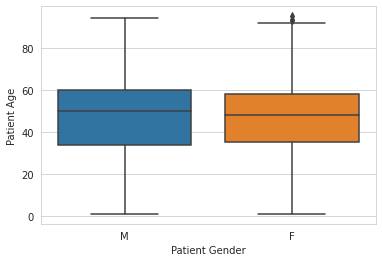

In [86]:
# look at age outliers and try to clean up
sns.set_style('whitegrid')
sns.boxplot(x = 'Patient Gender', y = 'Patient Age', data = df)

In [15]:
# how many records have age > 100?

print('There are', len(df[df['Patient Age'] > 100]), 'records with Age > 100')

There are 16 records with Age > 100


In [0]:
# impute values over 100 to median age

median = df.loc[df['Patient Age'] <= 100, 'Patient Age'].median()
df['Patient Age'] = np.where(df['Patient Age'] > 100, median, df['Patient Age'])

Text(0.5, 1.0, 'Age Breakdown')

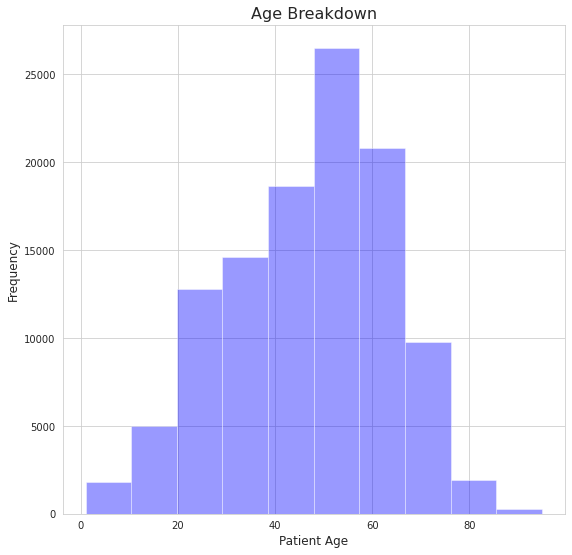

In [84]:
# show how ages break down 
plt.figure(figsize=(9,9))
sns.distplot(df['Patient Age'], kde = False, color = 'blue', bins = 10)
plt.xlabel('Patient Age', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.title('Age Breakdown', fontsize = 16)

**Look at how the images are labeled with their conditions**


*   Some labels have multiple conditions
*   First look at the label counts by combining multiple conditions into 1 label



In [0]:
# how many images are in each label?

df['Finding Labels'].value_counts()

No Finding                                             60361
Infiltration                                            9547
Atelectasis                                             4215
Effusion                                                3955
Nodule                                                  2705
                                                       ...  
Emphysema|Fibrosis|Infiltration|Pneumothorax               1
Atelectasis|Edema|Emphysema|Pneumothorax                   1
Infiltration|Effusion                                      1
Effusion|Emphysema|Infiltration|Nodule|Pneumothorax        1
Emphysema|Infiltration|Pneumonia                           1
Name: Finding Labels, Length: 836, dtype: int64

**There are 836 unique image labels.  Many of them have multiple diagnoses.**

In [0]:
# create updated Image label for multiple diagnoses
# these are separated by | in the finding labels

def multiple_conditions(x):
  if x.find('|') == -1:
    return x
  return 'Multiple Conditions'

df['Contition_Updated'] = df['Finding Labels'].apply(multiple_conditions)


Text(0.5, 1.0, 'Count of Image Results')

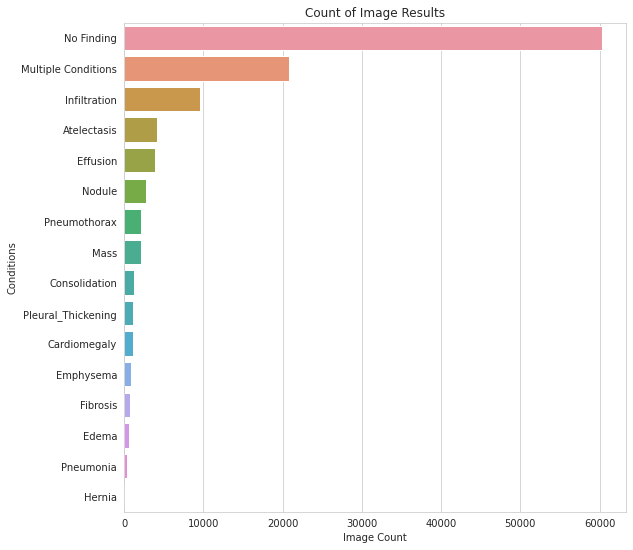

In [83]:
# show counts of conditions

label_count = df.groupby('Contition_Updated').size().reset_index()
label_count.rename(columns={0:'Counts'},inplace = True)
label_count = label_count.sort_values(['Counts'], ascending=False).reset_index(drop = True)

plt.figure(figsize=(9,9))
sns.barplot(x = 'Counts', y = 'Contition_Updated', data = label_count)
plt.xlabel('Image Count')
plt.ylabel('Conditions')
plt.title('Count of Image Results')


**Split out multiple condition labels so that they are captured with each individual condition**

In [0]:
# separate the different conditions in each image to classify them better
# use one-hot encoding

conditions = ['No Finding','Infiltration','Atelectasis','Effusion','Nodule','Pneumothorax','Mass','Consolidation','Pleural_Thickening','Cardiomegaly','Emphysema','Fibrosis','Edema','Pneumonia','Hernia']

for i in conditions :
    df[i] = df['Finding Labels'].apply(lambda x: 1 if i in x else 0)

# melt data together to get count of all conditions
df_2 = pd.melt(df, id_vars=['Image Index','Finding Labels','Patient ID','Patient Gender','Patient Age'], value_vars = list(conditions), var_name='Labels', value_name='Count')



Text(0.5, 1.0, 'Count of Image Results')

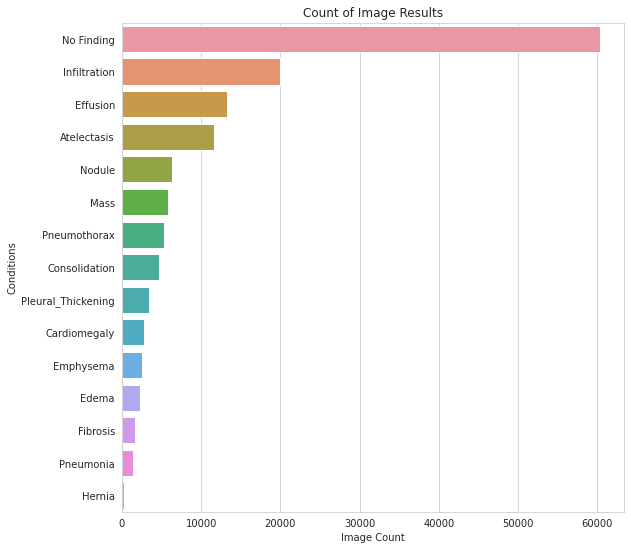

In [82]:
# how many conditions are there now?
new_label_count = df_2.groupby('Labels').sum().reset_index()
new_label_count.drop(['Patient ID','Patient Age'], axis = 1, inplace = True)
new_label_count.rename(columns={0:'Counts'},inplace = True)
new_label_count = new_label_count.sort_values(['Count'], ascending=False).reset_index(drop = True)

plt.figure(figsize=(9,9))
sns.barplot(x = 'Count', y = 'Labels', data = new_label_count)
plt.xlabel('Image Count')
plt.ylabel('Conditions')
plt.title('Count of Image Results')


In [79]:
new_label_count.head(20)

,Labels,Count
0,No Finding,60361
1,Infiltration,19894
2,Effusion,13317
3,Atelectasis,11559
4,Nodule,6331
5,Mass,5782
6,Pneumothorax,5302
7,Consolidation,4667
8,Pleural_Thickening,3385
9,Cardiomegaly,2776
